# Get S&p 500 companies and select tickers related to AI

In [34]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')
symbols = sp500['Symbol'].tolist()[:500]

# Get the historical price data for each symbol
data = yf.download(symbols, start='2018-01-01', end='2023-03-23', group_by='ticker')

# save the data to a csv file
data.to_csv('sp500.csv')

[*********************100%***********************]  500 of 500 completed


In [65]:

# Read the data from the csv file
data = pd.read_csv('sp500.csv', header=[0,1], index_col=0)


symbols = data.columns.levels[0].tolist()

# Calculate the daily returns for each symbol
returns = pd.DataFrame()
for symbol in symbols:
    returns[symbol] = data[(symbol, 'Adj Close')].pct_change().iloc[1:]

print(data)


/tmp/ipykernel_4743/2908619993.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[symbol] = data[(symbol, 'Adj Close')].pct_change().iloc[1:]
/tmp/ipykernel_4743/2908619993.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[symbol] = data[(symbol, 'Adj Close')].pct_change().iloc[1:]
/tmp/ipykernel_4743/2908619993.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

                  WBD                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2018-01-02  22.959999  23.370001  22.430000  23.110001  23.110001   5028200   
2018-01-03  23.180000  23.340000  22.590000  22.620001  22.620001   5292900   
2018-01-04  22.680000  22.709999  21.879999  22.129999  22.129999   7875900   
2018-01-05  22.180000  22.230000  21.580000  22.000000  22.000000   8498800   
2018-01-08  22.049999  22.410000  21.790001  22.370001  22.370001   4103800   
...               ...        ...        ...        ...        ...       ...   
2023-03-16  13.450000  14.230000  13.390000  14.160000  14.160000  13732900   
2023-03-17  14.760000  14.890000  14.200000  14.340000  14.340000  32000400   
2023-03-20  14.260000  14.540000  14.110000  14.240000  14.240000  16431900   
2023-03-21  14.480000  15.140000  14.410000  15.0900

/tmp/ipykernel_4743/2908619993.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[symbol] = data[(symbol, 'Adj Close')].pct_change().iloc[1:]
/tmp/ipykernel_4743/2908619993.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[symbol] = data[(symbol, 'Adj Close')].pct_change().iloc[1:]
/tmp/ipykernel_4743/2908619993.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISH', 'DLR', 

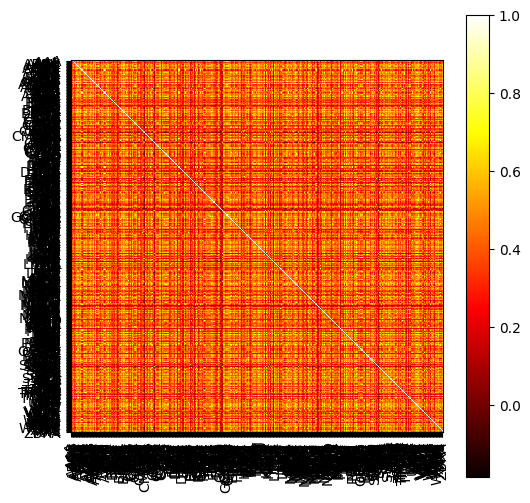

In [66]:
'''
The structure is now:
                   A       AAL       AAP      AAPL      ABBV       ABC  \
Date                                                                     
2018-01-03  0.025444 -0.012266  0.009049 -0.000174  0.015649  0.003722   
2018-01-04 -0.007501  0.006305  0.036899  0.004645 -0.005703 -0.002225   
2018-01-05  0.015988 -0.000380  0.010631  0.011385  0.017408  0.012105   
2018-01-08  0.002146 -0.009877 -0.007042 -0.003714 -0.016022  0.016576   
2018-01-09  0.024554 -0.000959 -0.008080 -0.000115  0.007539  0.006398   
...              ...       ...       ...       ...       ...       ...   
2023-03-16  0.020816  0.01
'''

print(symbols)
#
# Calculate the correlation matrix
corr = returns.corr()

# plot the correlation matrix
plt.figure(figsize=(6,6))
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.show()

# Get list of Information Technology stocks

In [93]:
# Read the S&P 500 companies data from Wikipedia
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')

# Filter the companies based on GICS Sub-Industry or company description
ai_companies = sp500[sp500['GICS Sector'] == 'Information Technology']

# Print the AI companies
print(len(ai_companies[['Symbol', 'Security', 'GICS Sub-Industry']]))

66


/tmp/ipykernel_4743/2240752719.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')


# Get AI publications data

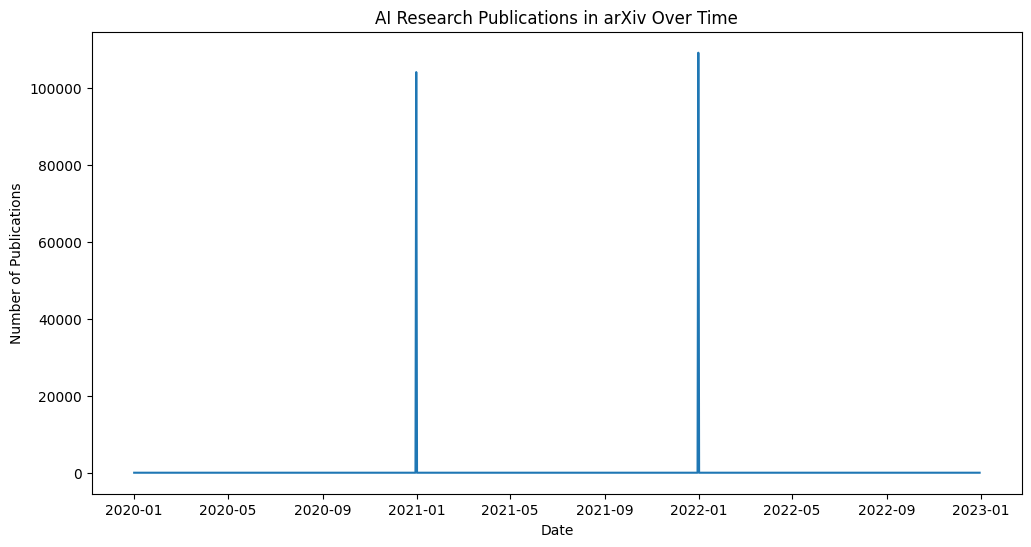

In [112]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

def get_arxiv_publications_count(start_date='2020-01-01', end_date='2022-12-31'):

    date_range = pd.date_range(start_date, end_date, freq='D')  # Monthly frequency
    publications_count = []

    for i in range(len(date_range) - 1):
        start_month = date_range[i].strftime('%Y-%m-%d')
        end_month = date_range[i + 1].strftime('%Y-%m-%d')

        arxiv_api_url = "http://export.arxiv.org/api/query"
        query = f"(all:artificial intelligence OR all:machine learning OR all:deep learning OR all:neural networks OR all:natural language processing OR all:computer vision) AND submittedDate:[{start_month} TO {end_month}]"
        params = {
            "search_query": query,
            "start": 0,
            "max_results": 0,
        }

        response = requests.get(arxiv_api_url, params=params)
        response.raise_for_status()
        xml_content = response.content

        # save the response to a file
        with open('publications_data.xml', 'wb') as f:
            f.write(xml_content)

        soup = BeautifulSoup(xml_content, "xml")
        total_results = int(soup.find("opensearch:totalResults").text)
        publications_count.append(total_results)
    
    return date_range, publications_count

date_range, publications_count = get_arxiv_publications_count()

# Create a dataframe with the publication counts
publications_df = pd.DataFrame({'date': date_range[:-1], 'count': publications_count})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(publications_df['date'], publications_df['count'])
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.title('AI Research Publications in arXiv Over Time')
plt.show()


In [4]:
date_range = pd.date_range('2022-12-1', '2022-12-31', freq='D')  # Monthly frequency
publications_count = []

for i in range(len(date_range) - 1):
    start_day = date_range[i].strftime('%Y-%m-%d')
    arxiv_api_url = "http://export.arxiv.org/api/query"
    query = f"(all:artificial intelligence OR all:machine learning OR all:deep learning OR all:neural networks OR all:natural language processing OR all:computer vision) AND submittedDate:[{start_day} TO {start_day+1}]"
    params = {
        "search_query": query,
        "start": 0,
        "max_results": 0,
    }

    response = requests.get(arxiv_api_url, params=params)
    response.raise_for_status()
    xml_content = response.content

    # save the response to a file
    with open('publications_data.xml', 'wb') as f:
        f.write(xml_content)

TypeError: can only concatenate str (not "int") to str

In [14]:
import requests
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import arxiv
import urllib.request
import time
import feedparser

# set start and end date for search
start_date = datetime(2022, 6, 1)
search_query = urllib.parse.quote("cat:cs.AI OR cat:cs.LG OR cs.NE OR stat.ML")

i = 0
results_per_iteration = 1000
wait_time = 3
papers = []
date = None
print('Searching arXiv for %s' % search_query)

base_url = 'http://export.arxiv.org/api/query?';

# while date is not earlier than start date
while date is None or date >= start_date:
	print("Results %i - %i" % (i,i+results_per_iteration))

	query = 'search_query=%s&start=%i&max_results=%i&sortBy=submittedDate&sortOrder=descending' % (search_query,
															i,
															results_per_iteration)

	# perform a GET request using the base_url and query
	response = urllib.request.urlopen(base_url+query).read()

	# parse the response using feedparser
	feed = feedparser.parse(response)
	# Run through each entry, and print out information
	for entry in feed.entries:
		#print('arxiv-id: %s' % entry.id.split('/abs/')[-1])
		#print('Title:  %s' % entry.title)
		#feedparser v4.1 only grabs the first author
		#print('First Author:  %s' % entry.author)
		paper = {}
		
		paper["date"] = entry.published
		year = paper["date"][0:4]
		paper["title"] = entry.title
		paper["first_author"] = entry.author
		paper["summary"] = entry.summary
		papers.append(paper)
		if len(papers) > 10 and papers[-1]["date"] == papers[-10]["date"]:
			date = start_date - timedelta(days=1)
			break

		date = datetime.strptime(entry.updated, "%Y-%m-%dT%H:%M:%SZ") 
		if date < start_date:
			break

	# Sleep a bit before calling the API again
	print('Current paper:', entry.title)
	print('Current date:', entry.published)
	i += results_per_iteration
	time.sleep(wait_time)


Searching arXiv for cat%3Acs.AI%20OR%20cat%3Acs.LG%20OR%20cs.NE%20OR%20stat.ML
Results 0 - 1000
Current paper: Sample-efficient Adversarial Imitation Learning
Current date: 2023-03-14T12:36:01Z
Results 1000 - 2000
Current paper: Naming Objects for Vision-and-Language Manipulation
Current date: 2023-03-06T03:43:14Z
Results 2000 - 3000
Current paper: AugGPT: Leveraging ChatGPT for Text Data Augmentation
Current date: 2023-02-25T06:58:16Z
Results 3000 - 4000
Current paper: jazznet: A Dataset of Fundamental Piano Patterns for Music Audio Machine
  Learning Research
Current date: 2023-02-17T00:13:22Z
Results 4000 - 5000
Current paper: jazznet: A Dataset of Fundamental Piano Patterns for Music Audio Machine
  Learning Research
Current date: 2023-02-17T00:13:22Z
Results 5000 - 6000
Current paper: Weight Prediction Boosts the Convergence of AdamW
Current date: 2023-02-01T02:58:29Z
Results 6000 - 7000
Current paper: Weight Prediction Boosts the Convergence of AdamW
Current date: 2023-02-01T02:5

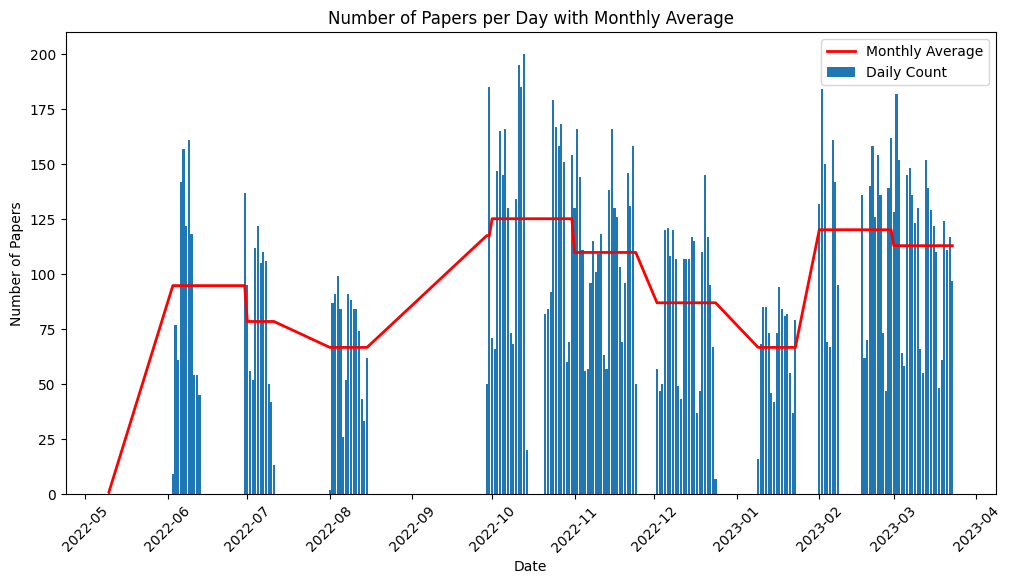

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# convert to pandas dataframe
df = pd.DataFrame(papers)

# use bining to count the number of papers per day
df['date'] = pd.to_datetime(df['date'])
daily_counts = df.groupby(df['date'].dt.date).size().reset_index(name='count')
daily_counts['date'] = pd.to_datetime(daily_counts['date'])
daily_counts['month_year'] = daily_counts['date'].dt.strftime('%Y-%m')


monthly_avg = daily_counts.groupby('month_year')['count'].mean().reset_index(name='monthly_avg')

# Merge daily_counts and monthly_avg
daily_counts = daily_counts.merge(monthly_avg, on='month_year')


# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(daily_counts['date'], daily_counts['count'], label='Daily Count')
plt.plot(daily_counts['date'], daily_counts['monthly_avg'], color='r', label='Monthly Average', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Number of Papers')
plt.title('Number of Papers per Day with Monthly Average')
plt.xticks(rotation=45)
plt.legend()
plt.show()